<a href="https://colab.research.google.com/github/argennof/EyCD2022/blob/main/Entregable_2_Nico_parte1_ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DIPLOMATURA 2022**

# EXPLORACIÓN Y CURACIÓN DE DATOS

## Entregable # 2 Parte 1

## GRUPO Nº24

## INTEGRANTES:
   - Diana Fonnegra
   - Clarisa Manzone
   - Nico Rosales
   - Daniel Rubio

In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

import seaborn
seaborn.set_context('talk');



Pasamos a definir dos dataset:<br>
> 1- df_melb con los datos de los precios de las casas de Melbourne<br>
 2- df_airbnb con los datos de los alquileres de airbnb en Melbourne

In [ ]:
url_1 = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv'
url_2 = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv'
df_melb = pd.read_csv(url_1)
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
df_airbnb = pd.read_csv(url_2, usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Exploramos las columnas de ambos df

In [ ]:
print(df_melb.columns)
print(df_airbnb.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df_melb.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00,13580.00,13580.00,13580.00,13580.00,13580.00,13518.00,13580.00,7130.00,8205.00,13580.00,13580.00,13580.00
mean,2.94,1075684.08,10.14,3105.30,2.91,1.53,1.61,558.42,151.97,1964.68,-37.81,145.00,7454.42
std,0.96,639310.72,5.87,90.68,0.97,0.69,0.96,3990.67,541.01,37.27,0.08,0.10,4378.58
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.43,249.00
25%,2.00,650000.00,6.10,3044.00,2.00,1.00,1.00,177.00,93.00,1940.00,-37.86,144.93,4380.00
50%,3.00,903000.00,9.20,3084.00,3.00,1.00,2.00,440.00,126.00,1970.00,-37.80,145.00,6555.00
75%,3.00,1330000.00,13.00,3148.00,3.00,2.00,2.00,651.00,174.00,1999.00,-37.76,145.06,10331.00
max,10.00,9000000.00,48.10,3977.00,20.00,8.00,10.00,433014.00,44515.00,2018.00,-37.41,145.53,21650.00


In [ ]:
df_melb.Price.describe()

count     13580.00
mean    1075684.08
std      639310.72
min       85000.00
25%      650000.00
50%      903000.00
75%     1330000.00
max     9000000.00
Name: Price, dtype: float64

In [ ]:
df_melb['Price'].isnull().sum()

0

El precio de las casas varían desde \$85.000 dólares hasta \$9.000.000. Además, tenemos una desviación estandar de \$639.310<br>
Vemos en un boxplot la distribución de los valores

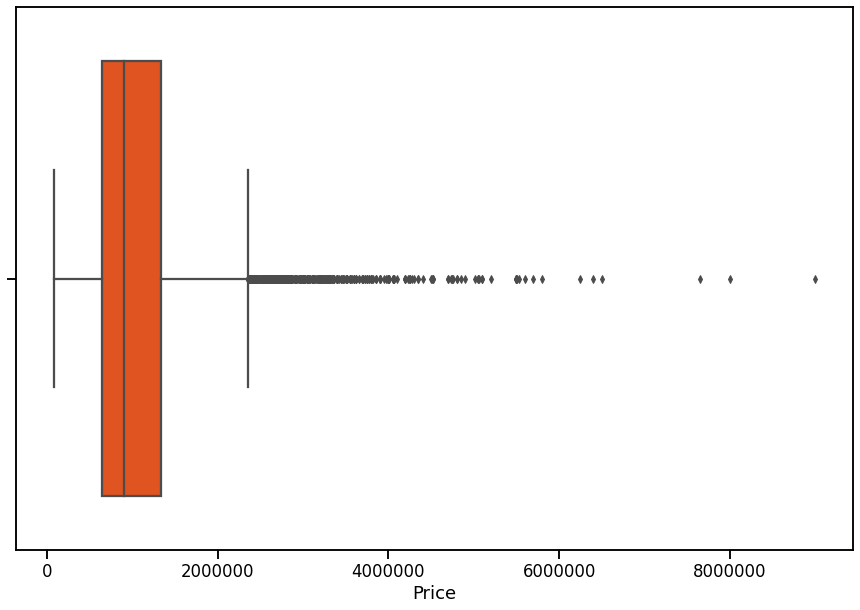

In [ ]:
plt.figure(figsize=(15, 10))
seaborn.boxplot(data=df_melb, x='Price',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
quantile_05 = 0.05
quantile_95 = 0.95


In [ ]:
df_melb_perc = df_melb.loc[ (df_melb.Price > df_melb.Price.quantile(quantile_05)) & (df_melb.Price < df_melb.Price.quantile(quantile_95))]
df_melb_perc.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,12214.00,12214.00,12214.00,12214.00,12214.00,12214.00,12155.00,12214.00,6352.00,7280.00,12214.00,12214.00,12214.00
mean,2.96,1011430.30,10.30,3103.64,2.93,1.51,1.61,523.84,149.69,1965.09,-37.81,145.00,7403.25
std,0.88,430553.36,5.90,90.96,0.89,0.65,0.95,1513.17,570.14,37.16,0.08,0.11,4373.43
min,1.00,406000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.49,249.00
25%,2.00,672000.00,6.30,3044.00,2.00,1.00,1.00,188.25,96.00,1941.00,-37.86,144.93,4217.00
50%,3.00,904000.00,9.70,3082.00,3.00,1.00,2.00,438.00,126.00,1970.00,-37.80,145.00,6543.00
75%,3.00,1290000.00,13.10,3147.00,3.00,2.00,2.00,648.00,168.00,2000.00,-37.75,145.06,10175.00
max,10.00,2290000.00,48.10,3977.00,20.00,8.00,10.00,76000.00,44515.00,2018.00,-37.45,145.53,21650.00


In [ ]:
print(f'Tamaño de df_melb:  \t\t{len(df_melb)}')
print(f'Media de df_melb: \t\t{df_melb.Price.mean()}')
print(f'Tamaño de df_melb_perc: \t{len(df_melb_perc)}')
print(f'Media de df_melb_perc: \t\t{df_melb_perc.Price.mean()}')
print(f'Filas debajo del percentil 0.05: {len(df_melb.loc[df_melb.Price < df_melb.Price.quantile(quantile_05)])}')
print(f'Filas arriba del percentil 0.95: {len(df_melb.loc[df_melb.Price > df_melb.Price.quantile(quantile_95)])}')
print(f'Filas quitadas: \t\t{len(df_melb) - len(df_melb_perc)}')

Tamaño de df_melb:  		13580
Media de df_melb: 		1075684.079455081
Tamaño de df_melb_perc: 	12214
Media de df_melb_perc: 		1011430.3021942034
Filas debajo del percentil 0.05: 671
Filas arriba del percentil 0.95: 679
Filas quitadas: 		1366


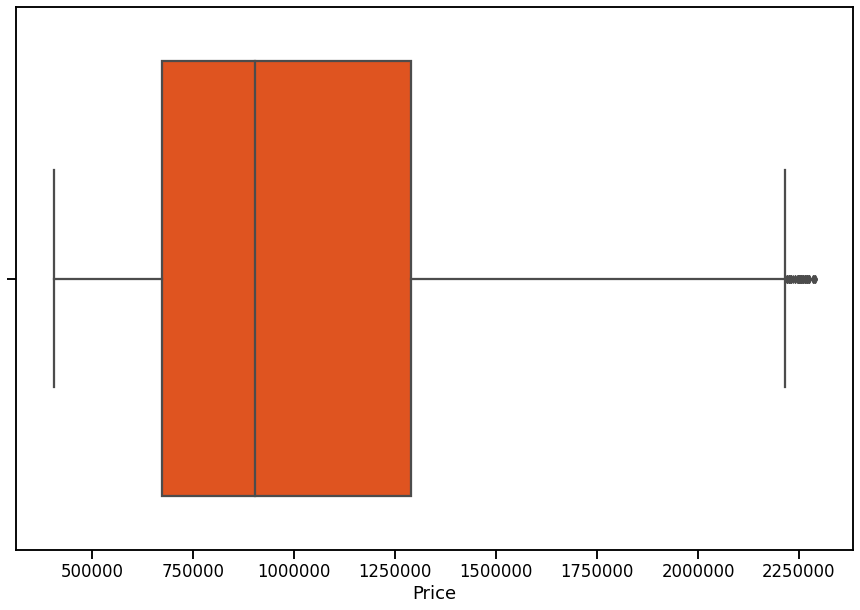

In [ ]:
plt.figure(figsize=(15, 10))
seaborn.boxplot(data=df_melb_perc, x='Price',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
df_melb_perc.Rooms.max()

10

In [ ]:
def contar_habitaciones(column):
  
  for hab in range(column.max()+1):
    for row in column:
    
      contador = column.loc[column == hab].sum()
    print(f'Cantidad de casas con {hab} habitaciones: {contador}')

In [ ]:
contar_habitaciones(df_melb_perc.Rooms)

Cantidad de casas con 0 habitaciones: 0
Cantidad de casas con 1 habitaciones: 283
Cantidad de casas con 2 habitaciones: 6812
Cantidad de casas con 3 habitaciones: 17025
Cantidad de casas con 4 habitaciones: 9408
Cantidad de casas con 5 habitaciones: 2140
Cantidad de casas con 6 habitaciones: 330
Cantidad de casas con 7 habitaciones: 49
Cantidad de casas con 8 habitaciones: 56
Cantidad de casas con 9 habitaciones: 0
Cantidad de casas con 10 habitaciones: 10


In [ ]:
df_melb_perc.loc[df_melb_perc.Rooms == 1].describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,283.00,283.00,283.00,283.00,283.00,283.00,280.00,283.00,138.00,176.00,283.00,283.00,283.00
mean,1.00,575537.28,4.92,3113.67,1.05,1.01,0.88,382.87,61.06,1976.82,-37.82,144.99,8929.18
std,0.00,259961.04,3.06,63.62,0.25,0.13,0.55,1021.57,31.23,34.46,0.04,0.04,4469.80
min,1.00,407000.00,0.70,3000.00,1.00,0.00,0.00,0.00,1.00,1888.00,-38.01,144.81,1123.00
25%,1.00,440000.00,2.75,3058.00,1.00,1.00,1.00,0.00,50.00,1960.00,-37.85,144.97,5358.50
50%,1.00,482500.00,4.50,3122.00,1.00,1.00,1.00,0.00,55.00,1985.00,-37.83,144.99,8400.00
75%,1.00,562500.00,6.10,3181.00,1.00,1.00,1.00,248.50,62.00,2005.00,-37.80,145.00,13240.00
max,1.00,2115000.00,21.50,3207.00,3.00,2.00,4.00,8223.00,303.00,2016.00,-37.68,145.09,21650.00


In [ ]:
df_melb_perc.loc[df_melb_perc.Rooms == 2].describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,3406.00,3406.00,3406.00,3406.00,3406.00,3406.00,3380.00,3406.00,1729.00,2107.00,3406.00,3406.00,3406.00
mean,2.00,791766.24,7.55,3102.41,2.02,1.14,1.13,423.18,94.49,1966.03,-37.82,144.99,7749.25
std,0.00,311606.65,4.17,62.10,0.21,0.37,0.69,1466.31,102.17,37.41,0.06,0.07,4331.69
min,2.00,406000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1830.00,-38.16,144.66,394.00
25%,2.00,566000.00,4.50,3053.00,2.00,1.00,1.00,0.00,73.00,1950.00,-37.85,144.95,4675.00
50%,2.00,706000.00,7.00,3087.00,2.00,1.00,1.00,159.00,85.00,1970.00,-37.81,144.99,6821.00
75%,2.00,930750.00,10.40,3161.00,2.00,1.00,1.00,368.00,102.00,2000.00,-37.77,145.03,10412.00
max,2.00,2265000.00,38.00,3782.00,5.00,3.00,6.00,37000.00,3558.00,2018.00,-37.65,145.45,21650.00


In [ ]:
df_melb_perc.loc[~(df_melb_perc.Rooms < df_melb_perc.Bedroom2 + df_melb_perc.Bathroom)].describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,249.00,249.00,249.00,249.00,249.00,249.00,249.00,249.00,117.00,131.00,249.00,249.00,249.00
mean,3.35,1046680.72,8.45,3083.86,2.14,1.01,1.31,424.06,143.50,1944.38,-37.80,144.98,7218.96
std,0.95,410738.50,3.69,57.86,0.88,0.54,0.97,351.16,114.37,33.72,0.06,0.08,4504.16
min,2.00,410000.00,1.50,3000.00,0.00,0.00,0.00,0.00,20.00,1890.00,-38.10,144.80,588.00
25%,3.00,758500.00,6.30,3039.00,2.00,1.00,1.00,209.00,99.00,1920.00,-37.84,144.92,3755.00
50%,3.00,970000.00,8.20,3072.00,2.00,1.00,1.00,426.00,126.00,1950.00,-37.80,144.99,5682.00
75%,4.00,1295000.00,11.20,3127.00,3.00,1.00,2.00,600.00,155.00,1965.00,-37.76,145.04,9028.00
max,8.00,2250000.00,34.90,3207.00,6.00,3.00,5.00,4051.00,1022.00,2014.00,-37.69,145.18,21650.00


In [ ]:
df_melb_clean = df_melb_perc.loc[df_melb_perc.Rooms < df_melb_perc.Bedroom2 + df_melb_perc.Bathroom]

In [ ]:
contar_habitaciones(df_melb_clean.Rooms)

Cantidad de casas con 0 habitaciones: 0
Cantidad de casas con 1 habitaciones: 283
Cantidad de casas con 2 habitaciones: 6744
Cantidad de casas con 3 habitaciones: 16650
Cantidad de casas con 4 habitaciones: 9124
Cantidad de casas con 5 habitaciones: 2080
Cantidad de casas con 6 habitaciones: 306
Cantidad de casas con 7 habitaciones: 42
Cantidad de casas con 8 habitaciones: 40
Cantidad de casas con 9 habitaciones: 0
Cantidad de casas con 10 habitaciones: 10


In [ ]:
df_melb_recort = df_melb_clean.loc[df_melb_clean.Rooms < 7]
df_melb_recort.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,11953.00,11953.00,11953.00,11953.00,11953.00,11953.00,11894.00,11953.00,6230.00,7142.00,11953.00,11953.00,11953.00
mean,2.94,1010356.66,10.34,3104.05,2.95,1.52,1.62,525.79,149.76,1965.46,-37.81,145.00,7407.46
std,0.86,430771.84,5.93,91.51,0.87,0.64,0.95,1528.68,575.47,37.12,0.08,0.11,4371.89
min,1.00,406000.00,0.00,3000.00,1.00,0.00,0.00,0.00,0.00,1196.00,-38.18,144.49,249.00
25%,2.00,670000.00,6.30,3044.00,2.00,1.00,1.00,188.00,96.00,1945.00,-37.86,144.93,4242.00
50%,3.00,901000.00,9.70,3082.00,3.00,1.00,2.00,438.00,126.00,1970.00,-37.80,145.00,6543.00
75%,3.00,1290000.00,13.30,3148.00,3.00,2.00,2.00,649.00,168.01,2000.00,-37.75,145.06,10175.00
max,6.00,2290000.00,48.10,3977.00,20.00,8.00,10.00,76000.00,44515.00,2018.00,-37.45,145.53,21650.00


**Ahora vamos a analizar el conjunto de datos df_airbnb**

In [ ]:
df_airbnb.describe()

,latitude,longitude,price,weekly_price,monthly_price
count,22895.00,22895.00,22895.00,2524.00,1891.00
mean,-37.83,145.01,148.00,906.98,3234.35
std,0.07,0.13,210.88,821.22,2808.09
min,-38.22,144.48,0.00,91.00,400.00
25%,-37.85,144.96,71.00,450.00,1700.00
50%,-37.82,144.98,111.00,750.00,2800.00
75%,-37.80,145.01,165.00,1066.00,3912.50
max,-37.48,145.84,12624.00,11536.00,54258.00


In [ ]:
df_airbnb.dtypes

description               object
neighborhood_overview     object
street                    object
neighborhood              object
city                      object
suburb                    object
state                     object
zipcode                   object
latitude                 float64
longitude                float64
price                      int64
weekly_price             float64
monthly_price            float64
dtype: object

In [ ]:
df_airbnb.zipcode.value_counts()

3000.0        2491
3000           876
3006.0         860
3182.0         579
3182           556
              ... 
3096             1
3812             1
3000\n3000       1
3752             1
4068.0           1
Name: zipcode, Length: 463, dtype: int64

In [ ]:
df_airbnb = df_airbnb.loc[~(df_airbnb.zipcode.isnull())]

In [ ]:
df_airbnb['zipcode'] = pd.to_numeric(df_airbnb.zipcode, errors='coerce')

In [ ]:
len(df_airbnb.zipcode.unique())

464

In [ ]:
df_airbnb.zipcode.value_counts()

3000.00     3367
3006.00     1268
3182.00     1135
3141.00      881
3004.00      728
            ... 
3785.00        1
3096.00        1
30122.00       1
3912.00        1
4068.00        1
Name: zipcode, Length: 247, dtype: int64

In [ ]:
hist_zipcode = df_airbnb.zipcode.value_counts().to_frame(name='Cantidad de casas')

In [ ]:
hist_zipcode = hist_zipcode.rename_axis(index='zipcode')

,Cantidad de casas
zipcode,
3000.00,3367
3006.00,1268
3182.00,1135
3141.00,881
3004.00,728
...,...
3785.00,1
3096.00,1
30122.00,1


In [ ]:
print(len(hist_zipcode))
print(len(hist_zipcode.loc[hist_zipcode['Cantidad de casas'] > 300]))
print(len(hist_zipcode.loc[hist_zipcode['Cantidad de casas'] > 200]))
print(len(hist_zipcode.loc[hist_zipcode['Cantidad de casas'] > 100]))
print(len(hist_zipcode.loc[hist_zipcode['Cantidad de casas'] > 75]))
print(len(hist_zipcode.loc[hist_zipcode['Cantidad de casas'] > 50]))

247
15
23
48
60
83
